<a href="https://colab.research.google.com/github/SarahAlketbi/Assignment-2-/blob/main/Activity2_questions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity #2 (5 marks)


Class Activity: Analyzing NYC Hyperlocal Air Quality Data with Spatial Join

# Objective:
- This activity reinforces concepts from Chapters 6 (Tables), 7 (Visualization), 8 (Functions and Tables), and 9 (Randomness). Students will analyze NYC hyperlocal air quality data using Python in a Jupyter Notebook (Google Colab). The focus will be on leveraging the Table abstraction wherever possible. Additionally, students will use spatial join techniques to combine air quality sensor readings with geographic data.

given a csv file containing longitude, latitude , and pm10  columns [Air Quality data](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv) representing readings of low cost air quality sensor mounted on moving vehicles, in addition to a geojson file containing polygons representing administrative divisions of NYC city known as neighbourhoods [nyc_polygon.geojson](https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson).
# Dataset Description
- Air Quality Sensor Readings (NYC_PM.csv) :
Attributes: SensorID, time, temperature, humidity, pm25,
Focus attributes: temperature, humidity, pm1,pm25,pm10,
- City Polygons (nyc_polygon.geojson) :
Contains polygons representing neighborhoods or boroughs in NYC.
Used for spatially joining geographic information with air quality data.

## **part - A** preprocessing [0 marks]

do all tasks and the subtasks!

# Onboarding Code Provided
- The following code will be provided in an onboarding Jupyter Notebook to help students get started:



In [18]:
'''from google.colab import drive
drive.mount('/content/drive')'''

"from google.colab import drive\ndrive.mount('/content/drive')"

import necessary libraries

In [19]:
import pandas as pd
import geopandas as gpd
import numpy as np
import matplotlib.pyplot as plt

In [20]:
from datascience import *
%matplotlib inline
#path_data = '../../../assets/data/'
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import numpy as np

###1. Read the CSV file containing PM sensor readings
 & Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame

In [21]:

# Step 1: Read the CSV file containing PM10 sensor readings
pm10_data = pd.read_csv('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/NYC_PM.csv',index_col=False)

# Step 2: Read the GeoJSON file containing neighborhood boundaries into a GeoDataFrame
nyc_neighborhoods = gpd.read_file('https://raw.githubusercontent.com/IsamAljawarneh/datasets/master/data/nyc_polygon.geojson')


In [22]:
#pm10_data.dtypes

### 2. convert the csv into a geodataframe and join it (sjoin) with the geojson, assign a coordinate reference system (CRS) the csv geodataframe which is identical to that of the geojson file, then perform the join, the result is a geodataframe, convert it to dataframe, and select pm10, neighborhood columns in a new dataframe

In [23]:
pm10_gdf = gpd.GeoDataFrame(pm10_data, geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude))
merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')

<ipython-input-23-d43866676e2a>:2: UserWarning: CRS mismatch between the CRS of left geometries and the CRS of right geometries.
Use `to_crs()` to reproject one of the input geometries to match the CRS of the other.

Left CRS: None
Right CRS: EPSG:4326

  merged_data = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how='inner', predicate='within')


In [24]:
#merged_data.dtypes

In [25]:
pollution_data = merged_data[['pm10','neighborhood']]

In [26]:
pollution_data.shape[0]

118495

In [27]:
#merged_data.rename(columns={'neighborhood': 'neighborhood1'}, inplace=True)

In [28]:
type(pollution_data)

pandas.core.frame.DataFrame

3. you need to convert</h1></section> from dataframe to Datascience Table. Use the following format: ```Table.from_df(df, keep_index=False)``` read more here
[create DS Table from DF](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.from_df.html)

**N.B.** <font color='red'>NOW, perform all tasks using the table abstraction as we have learned in the class!</font>

the following is the opposite:

[Table.to_df](https://www.data8.org/datascience/_autosummary/datascience.tables.Table.to_df.html)

what is the maximum pm10 value

In [29]:
pollution_data['pm10'].max()

87341.71

what is the maximum pm10 value

In [30]:
pollution_data['pm10'].min()

0.0

In [31]:
joined_table = Table().from_df(pollution_data)

show the first few rows of the table?

In [32]:
joined_table.show(2)

pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park


print minimum and maximum pm10 values?

In [33]:
pm10 = joined_table.column('pm10')
min(pm10), max(pm10)

(0.0, 87341.710000000006)

#Instructions for Students
-You task is to analyze NYC hyperlocal air quality data using the provided dataset. Complete the following tasks in your Jupyter Notebook. Each task is worth 1 mark , for a total of 5 marks . Use the Table abstraction wherever possible.

# Tasks

###Task 1: Explore the Joined Data Using Tables (1 Mark)
- Display the first 5 rows of the joined_table using .show().
- Print the number of rows and columns in the table.
- Identify any missing values in the table and handle them appropriately (e.g., drop rows with missing values or fill them with a default value).

In [37]:
joined_table.show(5)


pm10,neighborhood
11.35,Bronx Park
1.18,Bronx Park
0.76,Bronx Park
47.36,Bronx Park
6.18,Bronx Park


In [38]:

num_rows, num_columns = joined_table.num_rows, joined_table.num_columns
print(f"Number of rows: {num_rows}, Number of columns: {num_columns}")


Number of rows: 118495, Number of columns: 2


In [39]:
print(joined_table)


pm10  | neighborhood
11.35 | Bronx Park
1.18  | Bronx Park
0.76  | Bronx Park
47.36 | Bronx Park
6.18  | Bronx Park
0.73  | Bronx Park
1.22  | Bronx Park
5.82  | Bronx Park
11.04 | Bronx Park
1.29  | Bronx Park
... (118485 rows omitted)


In [44]:
import numpy as np

# Identify missing values using .apply()
missing_counts = {col: sum(joined_table.apply(lambda x: x is None, col)) for col in joined_table.labels}

# Print missing values per column
print("Missing values per column:")
for col, count in missing_counts.items():
    print(f"{col}: {count} missing values")

# Handle missing values: Drop rows where any column has missing values
if sum(missing_counts.values()) > 0:
    cleaned_table = joined_table.where(
        np.all([joined_table.apply(lambda x: x is not None, col) for col in joined_table.labels], axis=0)
    )
    print(f"\nRows after cleaning: {cleaned_table.num_rows}")
else:
    print("\nNo missing values found. No need to clean the table.")


Missing values per column:
pm10: 0 missing values
neighborhood: 0 missing values

No missing values found. No need to clean the table.


# Task 2: Create Summary Statistics Using Table Operations (1 Mark)

- Compute summary statistics (mean, median, min, max) for the attributes temperature, humidity, and pm25 using table operations like .column() and .apply().
- Group the data by borough and calculate the average pm25 levels for each borough using .group() or .pivot().
- Display the results in a new table.

In [49]:

import numpy as np
from datascience import Table

# Convert pm10_data (Pandas DataFrame) to a Table
dataset_table = Table().from_df(pm10_data)

# Check column names to ensure they exist
print("Columns in dataset_table:", dataset_table.labels)

# Compute summary statistics using Table operations
summary_stats = Table().with_columns(
    "Attribute", ["Temperature", "Humidity", "PM2.5"],
    "Mean", [
        dataset_table.column("temperature").mean(),
        dataset_table.column("humidity").mean(),
        dataset_table.column("pm25").mean()
    ],
    "Median", [
        np.median(dataset_table.column("temperature")),
        np.median(dataset_table.column("humidity")),
        np.median(dataset_table.column("pm25"))
    ],
    "Min", [
        min(dataset_table.column("temperature")),
        min(dataset_table.column("humidity")),
        min(dataset_table.column("pm25"))
    ],
    "Max", [
        max(dataset_table.column("temperature")),
        max(dataset_table.column("humidity")),
        max(dataset_table.column("pm25"))
    ]
)

# Display the summary statistics table
summary_stats.show()


Columns in dataset_table: ('SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity', 'pm1', 'pm25', 'pm10')


Attribute,Mean,Median,Min,Max
Temperature,8.24488,7.2,-7.9,10471
Humidity,50.1592,46.3,0,104.2
PM2.5,7.36112,3.01,0,3267.02


In [53]:
import geopandas as gpd
import pandas as pd
from datascience import Table

# Convert pm10_data to a GeoDataFrame
pm10_gdf = gpd.GeoDataFrame(
    pm10_data,
    geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude),
    crs="EPSG:4326"
)

# Ensure nyc_neighborhoods is in the same coordinate reference system (CRS)
nyc_neighborhoods = nyc_neighborhoods.to_crs(epsg=4326)

# Perform spatial join to assign each sensor reading to a borough
joined_gdf = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how="left", predicate="within")

# Convert the GeoDataFrame to a Pandas DataFrame for further processing
joined_data = joined_gdf.drop(columns=["geometry"])

# Convert to a Table format for Table operations
joined_table = Table().from_df(joined_data)

# Display the first few rows
joined_table.show(5)


SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


In [54]:
# Check if "borough" exists in the joined dataset
if "borough" in joined_table.labels:
    # Group the data by borough and compute the average PM2.5 levels
    borough_pm25_avg = joined_table.group("borough", np.mean).select("borough", "pm25 mean")

    # Rename the column for clarity
    borough_pm25_avg = borough_pm25_avg.relabel("pm25 mean", "Average PM2.5")

    # Display the grouped data
    borough_pm25_avg.show()
else:
    print("Column 'borough' is not in the dataset.")


borough,Average PM2.5
Bronx,7.795
Brooklyn,1.99695
Manhattan,2.37332
Queens,2.07253
nan,1.47129


In [57]:
print(joined_table.labels)


('SensorID', 'time', 'latitude', 'longitude', 'bin0', 'bin1', 'bin2', 'bin3', 'bin4', 'bin5', 'bin6', 'bin7', 'bin8', 'bin9', 'bin10', 'bin11', 'bin12', 'bin13', 'bin14', 'bin15', 'bin16', 'bin17', 'bin18', 'bin19', 'bin20', 'bin21', 'bin22', 'bin23', 'temperature', 'humidity', 'pm1', 'pm25', 'pm10', 'index_right', 'neighborhood', 'boroughCode', 'borough', '@id')


# Task 3: Visualize the Data Using Table-Based Plots (1 Mark)

- Create a bar chart showing the average pm25 levels for each borough using .barh().
- Create a scatter plot to visualize the relationship between temperature and pm25 using .scatter(). Add appropriate labels and a title to the plot.
- Create a histogram of humidity values across all neighborhoods using .hist().

In [58]:
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datascience import Table

# Convert pm10_data to a GeoDataFrame
pm10_gdf = gpd.GeoDataFrame(
    pm10_data,
    geometry=gpd.points_from_xy(pm10_data.longitude, pm10_data.latitude),
    crs="EPSG:4326"
)

# Ensure nyc_neighborhoods is in the same coordinate reference system (CRS)
nyc_neighborhoods = nyc_neighborhoods.to_crs(epsg=4326)

# Perform spatial join to assign each sensor reading to a borough
joined_gdf = gpd.sjoin(pm10_gdf, nyc_neighborhoods, how="left", predicate="within")

# Convert the GeoDataFrame to a Pandas DataFrame for further processing
joined_data = joined_gdf.drop(columns=["geometry"])

# Convert to a Table format for Table operations
joined_table = Table().from_df(joined_data)

# Display the first few rows
joined_table.show(5)


SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,index_right,neighborhood,boroughCode,borough,@id
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park


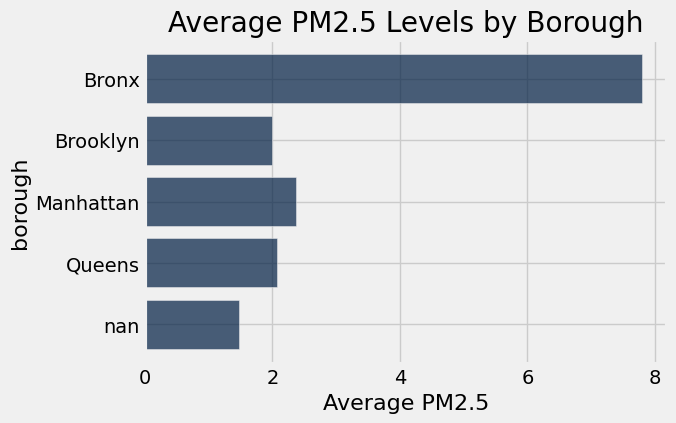

In [59]:
# Check if "borough" exists in the dataset
if "borough" in joined_table.labels:
    # Group the data by borough and compute the average PM2.5 levels
    borough_pm25_avg = joined_table.group("borough", np.mean).select("borough", "pm25 mean")

    # Rename the column for clarity
    borough_pm25_avg = borough_pm25_avg.relabel("pm25 mean", "Average PM2.5")

    # Create a horizontal bar chart
    borough_pm25_avg.barh("borough")

    # Add a title
    plt.title("Average PM2.5 Levels by Borough")
else:
    print("Column 'borough' is not in the dataset. Please check the spatial join step.")


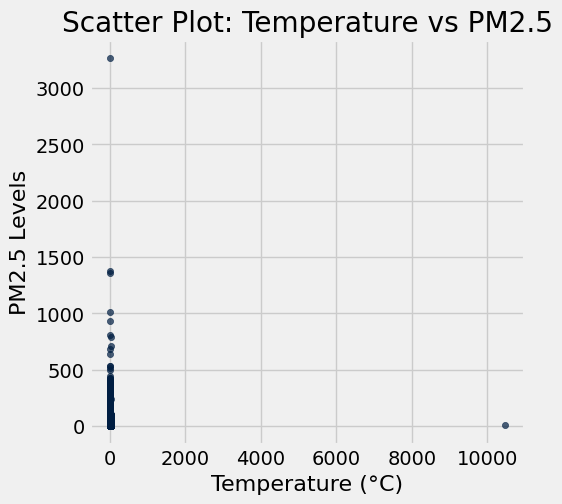

In [60]:
# Check if temperature and PM2.5 exist
if "temperature" in joined_table.labels and "pm25" in joined_table.labels:
    # Create a scatter plot
    joined_table.scatter("temperature", "pm25")

    # Add labels and title
    plt.xlabel("Temperature (°C)")
    plt.ylabel("PM2.5 Levels")
    plt.title("Scatter Plot: Temperature vs PM2.5")
else:
    print("Columns 'temperature' and 'pm25' are not in the dataset.")


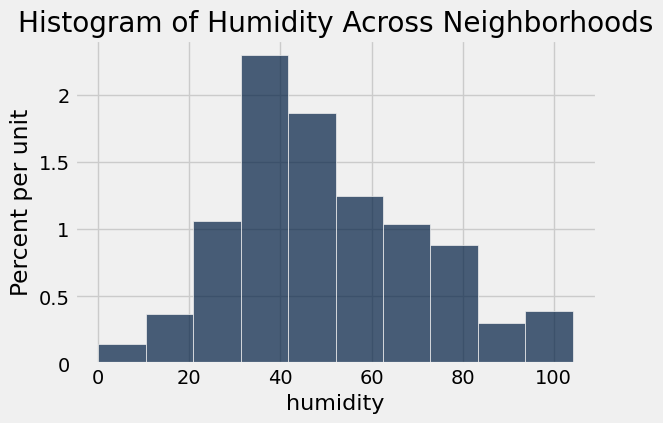

In [61]:
# Check if humidity exists in the dataset
if "humidity" in joined_table.labels:
    # Create a histogram for humidity
    joined_table.hist("humidity")

    # Add a title
    plt.title("Histogram of Humidity Across Neighborhoods")
else:
    print("Column 'humidity' is not in the dataset.")


# Task 4: Define and Use Functions with Tables (1 Mark)

- Write a function calculate_pm25_category(pm25) that categorizes PM2.5 levels as follows:
"Good" if pm25 < 12
"Moderate" if 12 <= pm25 < 35
"Unhealthy" if pm25 >= 35
- Apply this function to the pm25 column in the table using .apply() to create a new column called PM25_Category.
- Count the number of sensors in each PM2.5 category and display the results using .group().


In [62]:
# Define function to categorize PM2.5 levels
def calculate_pm25_category(pm25):
    if pm25 < 12:
        return "Good"
    elif 12 <= pm25 < 35:
        return "Moderate"
    else:
        return "Unhealthy"

# Test the function
print(calculate_pm25_category(10))  # Expected output: "Good"
print(calculate_pm25_category(20))  # Expected output: "Moderate"
print(calculate_pm25_category(40))  # Expected output: "Unhealthy"


Good
Moderate
Unhealthy


In [63]:
# Check if "pm25" exists before applying the function
if "pm25" in joined_table.labels:
    # Apply the function to the pm25 column
    joined_table = joined_table.with_column(
        "PM25_Category", joined_table.apply(calculate_pm25_category, "pm25")
    )

    # Display the first few rows
    joined_table.show(5)
else:
    print("Column 'pm25' is not in the dataset.")


SensorID,time,latitude,longitude,bin0,bin1,bin2,bin3,bin4,bin5,bin6,bin7,bin8,bin9,bin10,bin11,bin12,bin13,bin14,bin15,bin16,bin17,bin18,bin19,bin20,bin21,bin22,bin23,temperature,humidity,pm1,pm25,pm10,index_right,neighborhood,boroughCode,borough,@id,PM25_Category
NYCP1_01A,1579618560,40.8472,-73.8701,23,1,2,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.3,15.2,1.44,5.91,11.35,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.2,15.1,1.05,1.18,1.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.1,0.74,0.76,0.76,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,18,1,2,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16.1,15.2,1.15,4.48,47.36,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good
NYCP1_01A,1579618560,40.8472,-73.8701,20,3,0,2,2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,16,15.2,2.13,5.77,6.18,38,Bronx Park,2,Bronx,http://nyc.pediacities.com/Resource/Neighborhood/Bronx_Park,Good


In [64]:
# Check if "PM25_Category" exists before grouping
if "PM25_Category" in joined_table.labels:
    # Count the number of sensors in each PM2.5 category
    pm25_category_counts = joined_table.group("PM25_Category")

    # Display the results
    pm25_category_counts.show()
else:
    print("Column 'PM25_Category' is not in the dataset.")


PM25_Category,count
Good,102119
Moderate,12655
Unhealthy,3993


# Task 5: Simulate Random Sampling Using Tables (1 Mark)
- Randomly sample 10% of the rows from the table without replacement using .sample().
- Calculate the mean pm25 level for the sampled data.
- Repeat the random sampling process 100 times and store the mean pm25 values from each iteration in a list.
- Create a histogram of the 100 mean pm25 values to visualize the distribution of sample means.

In [65]:
# Check if "pm25" exists before sampling
if "pm25" in joined_table.labels:
    # Sample 10% of rows without replacement
    sample_size = int(0.1 * joined_table.num_rows)
    sampled_data = joined_table.sample(sample_size, with_replacement=False)

    # Calculate mean PM2.5 for the sample
    sample_mean_pm25 = np.mean(sampled_data.column("pm25"))

    # Display results
    print(f"Mean PM2.5 for sampled data: {sample_mean_pm25}")
else:
    print("Column 'pm25' is not in the dataset.")


Mean PM2.5 for sampled data: 7.464749073762208


In [66]:
# Initialize a list to store sample means
sample_means = []

# Run 100 iterations of random sampling
for _ in range(100):
    sampled_data = joined_table.sample(sample_size, with_replacement=False)
    sample_mean_pm25 = np.mean(sampled_data.column("pm25"))
    sample_means.append(sample_mean_pm25)

# Display the first 5 sample means for verification
print("First 5 sample means:", sample_means[:5])


First 5 sample means: [7.3055506904681708, 7.4890594476254639, 7.4214339845065664, 7.5703233411923208, 7.2235373863253614]


Text(0.5, 1.0, 'Histogram of Sample Mean PM2.5 Values')

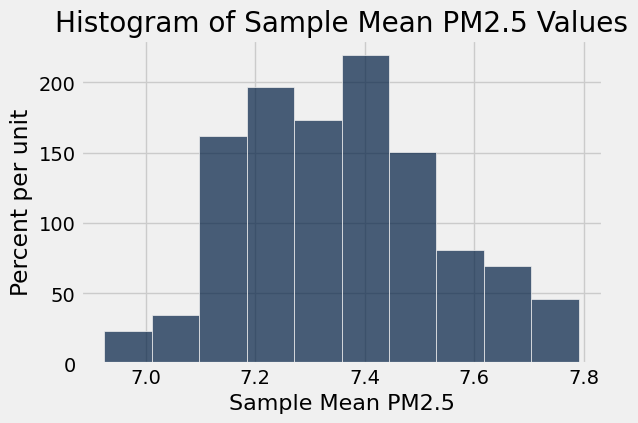

In [68]:
# Create a Table with the sample means
sample_means_table = Table().with_column("Sample Mean PM2.5", sample_means)

# Plot the histogram
sample_means_table.hist("Sample Mean PM2.5")

# Add a title
plt.title("Histogram of Sample Mean PM2.5 Values")


# Submission Guidelines
- Add a "Open in Colab" button at the top of your notebook using the following Markdown code:
[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/your-repo-path/notebook.ipynb)

- Upload your completed Jupyter Notebook to a GitHub repository.
- Submit the link to your GitHub repository in the Blackboard LMS along with the Jupyter solution file.
- <font color = red size = 6> ATTENTION!!! </font> Students are encouraged to work on groups, however the submission should be individual and each student should have her/his own unique final assignment solution, which is to be submitted in BB

# Grading Rubric
- Each task is worth 1 mark , based on the following criteria:

- Correctness : The solution produces the expected output using the Table abstraction .
- Clarity : Code is well-organized, readable, and includes comments explaining key steps.
- Creativity : Visualizations and analyses are presented in an engaging and insightful manner.

# Hints for Success
- Use the Table abstraction methods like .select(), .where(), .group(), .apply(), and .sample() for data manipulation.
- Refer to the slides and examples from book Chapters 6, 7, 8, and 9 for guidance on tables, functions, visualizations, and randomness.
- Test your code frequently to ensure it runs without errors.